In [22]:
import spacy
from spacy.tokens import DocBin
from tqdm import tqdm
import time
import subprocess
import pandas as pd
import ast
from random import shuffle
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import spacy

print("Toutes les libraries ont été importées")

Toutes les libraries ont été importées


In [3]:
print("Chargement du modèle spacy pré-entraîné...")
nlp_fr = spacy.load("fr_core_news_md")
print("\nModele spacy bien chargé")


Chargement du modèle spacy pré-entraîné

Modele spacy bien chargé


In [4]:
# Fonction de test pour vérifier la reconnaissance des entités sur du texte simple
def test_ner_recognition(text):
    print("Test pour vérifier la reconnaissance des entités avec spaCy...\n")
    doc = nlp_fr(text)
    spacy.displacy.render(doc, style="ent", jupyter=True)

texte_simple = '''Je souhaiterais me rendre de Paris à Marseille.
Quelle est la meilleure façon d'aller à Sannois depuis la gare de Toulouse ?
Je prévois de rendre visite à mon ami Patrick à Paris en partant de Bordeaux.
Comment puis-je aller de Marseille à Bordeaux sans passer par Paris ?
Quels sont les horaires des trains de Nantes à Lyon demain matin ?
Je dois voyager de Lille à Toulouse ce week-end, avez-vous des suggestions de trajet ?
Quel est le moyen le plus rapide pour me rendre de Lyon à Paris ?'''

test_ner_recognition(texte_simple)

Test pour vérifier la reconnaissance des entités avec spaCy...



In [5]:
def load_dataset(file_path):
    print("Chargement du dataset csv pour l'entrainement...")
    df = pd.read_csv(file_path, sep=',', encoding='utf-8', on_bad_lines='skip')
    print("\nDataset bien chargé")
    return df

df = load_dataset('../../dataset/raw/initial_training_data.csv')

print("\nAperçu du dataset : \n")
display(df)  # Affiche un aperçu du dataset sous forme de tableau

Chargement du dataset csv pour l'entrainement...

Dataset bien chargé

Aperçu du dataset : 



,text,entities
0,Je voudrais aller de Toulouse à Bordeaux.,"[{'start': 21, 'end': 29, 'label': 'DEPARTURE'..."
1,Comment me rendre à Port-Boulet depuis la gare...,"[{'start': 20, 'end': 31, 'label': 'DESTINATIO..."
2,Je veux aller voir mon ami Albert à Tours en p...,"[{'start': 36, 'end': 41, 'label': 'DESTINATIO..."
3,Y a-t-il des trains de Nantes à Montaigu ?,"[{'start': 23, 'end': 29, 'label': 'DEPARTURE'..."
4,Je souhaite me rendre à Paris en partant de To...,"[{'start': 25, 'end': 30, 'label': 'DESTINATIO..."
...,...,...
211,Je pars de Lyon pour rejoindre Rennes,"[{'start': 12, 'end': 16, 'label': 'DEPARTURE'..."
212,Je souhaite me rendre à Lyon en partant de Toulon,"[{'start': 25, 'end': 29, 'label': 'DESTINATIO..."
213,Je pars de Lyon pour rejoindre Nîmes,"[{'start': 12, 'end': 16, 'label': 'DEPARTURE'..."
214,Je souhaite me rendre à Lyon en partant de Nice,"[{'start': 25, 'end': 29, 'label': 'DESTINATIO..."


In [9]:
print("Nettoyage des données...\n") # pour supprimer des retours à la ligne, espaces inutiles, etc.
def clean_text(text):
    return text.replace('\r', '').strip()

df['text'] = df['text'].apply(clean_text)
print("Données ont été nettoyées")

Nettoyage des données...

Données ont été nettoyées


In [12]:
def verify_entity_alignment(text, entities):
    print("Vérification de l'alignement des entités\n")
    verified_entities = []
    for ent in entities:
        start, end, label = ent['start'], ent['end'], ent['label']
        # on verifie si l'extrait de texte correspond bien aux indices
        if text[start:end] == text[start:end]:
            verified_entities.append(ent)
        else:
            print(f"Skipping entity: {text[start:end]} in text: {text}")
    print("Vérification terminée")
    return verified_entities

In [13]:
def prepare_data_for_spacy(df):
    print("Conversion du dataset csv au format spaCy...\n")
    db = DocBin()
    data = list(zip(df['text'], df['entities']))
    print("On melange des données pour éviter l'apprentissage biaisé\n")
    shuffle(data)  # melange les données

    for text, entities in data:
        entities = ast.literal_eval(entities)  # on parse les entités
        verified_entities = verify_entity_alignment(text, entities)  # on verifie des indices

        if verified_entities:
            doc = nlp_fr.make_doc(text)
            doc.ents = create_entity_spans(doc, verified_entities)  # on cree des spans d'entités
            db.add(doc)
    
    print("Dataset a été bien converti au format spaCy\n")
    return db

In [14]:
def create_entity_spans(doc, verified_entities):
    print("Création de span d'entités\n")
    ents = []
    for ent in verified_entities:
        start, end, label = ent['start'], ent['end'], ent['label']
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span:
            ents.append(span)
    return ents

In [15]:
print("Préparation des données pour la conversion au format spaCy...\n")
db = prepare_data_for_spacy(df)

print("Sauvegarde des données au format spaCy...\n")
db.to_disk("../../dataset/processed/processed_training_data.spacy")
print("Sauvegardé !")

Préparation des données pour la conversion au format spaCy...

Conversion du dataset csv au format spaCy...

On melange des données pour éviter l'apprentissage biaisé

Vérification de l'alignement des entités

Vérification terminée
Création de span d'entités

Vérification de l'alignement des entités

Vérification terminée
Création de span d'entités

Vérification de l'alignement des entités

Vérification terminée
Création de span d'entités

Vérification de l'alignement des entités

Vérification terminée
Création de span d'entités

Vérification de l'alignement des entités

Vérification terminée
Création de span d'entités

Vérification de l'alignement des entités

Vérification terminée
Création de span d'entités

Vérification de l'alignement des entités

Vérification terminée
Création de span d'entités

Vérification de l'alignement des entités

Vérification terminée
Création de span d'entités

Vérification de l'alignement des entités

Vérification terminée
Création de span d'entités

Véri

In [16]:
# Fonction pour entraîner le modèle
def train_model(config_path, output_path, training_data_path):
    print("Génération de la configuration...\n")
    subprocess.run(f"python -m spacy init config {config_path} --lang fr --pipeline ner --optimize efficiency --force", shell=True)
    print("Configuration faite.\n")

    print("Début de l'entraînement du modèle...\n")
    
    # Lancer le processus d'entraînement
    process = subprocess.Popen(f"python -m spacy train {config_path} --output {output_path} --paths.train {training_data_path} --paths.dev {training_data_path}", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    with tqdm(total=100, desc="Entraînement du modèle") as pbar:
        while True:
            # on lit les lignes de sortie pour suivre l'avancement
            output = process.stdout.readline()
            if output == b"" and process.poll() is not None:
                break
            if output:
                print(output.decode().strip()) 

            pbar.update(1)
            time.sleep(1)


print("Lancement de l'entraînement...")
train_model('./configuration.cfg', '../../models/saved_models', '../../dataset/processed/processed_training_data.spacy')
print("Entraînement terminé.\n")

Lancement de l'entraînement...
Génération de la configuration...

Configuration faite.

Début de l'entraînement du modèle...



Entraînement du modèle:   1%|          | 1/100 [00:06<10:48,  6.55s/it]

ℹ Saving to output directory: ..\..\models\saved_models


Entraînement du modèle:   2%|▏         | 2/100 [00:07<05:22,  3.29s/it]

ℹ Using CPU


Entraînement du modèle:   3%|▎         | 3/100 [00:08<03:37,  2.25s/it]

Entraînement du modèle:   4%|▍         | 4/100 [00:09<02:48,  1.76s/it]

=========================== Initializing pipeline ===========================


Entraînement du modèle:   5%|▌         | 5/100 [00:18<06:53,  4.35s/it]

✔ Initialized pipeline


Entraînement du modèle:   6%|▌         | 6/100 [00:19<05:02,  3.22s/it]

Entraînement du modèle:   7%|▋         | 7/100 [00:20<03:51,  2.49s/it]

============================= Training pipeline =============================


Entraînement du modèle:   8%|▊         | 8/100 [00:21<03:05,  2.02s/it]

ℹ Pipeline: ['tok2vec', 'ner']


Entraînement du modèle:   9%|▉         | 9/100 [00:22<02:34,  1.70s/it]

ℹ Initial learn rate: 0.001


Entraînement du modèle:  10%|█         | 10/100 [00:23<02:13,  1.49s/it]

E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE


Entraînement du modèle:  11%|█         | 11/100 [00:24<01:59,  1.34s/it]

---  ------  ------------  --------  ------  ------  ------  ------


Entraînement du modèle:  12%|█▏        | 12/100 [00:25<01:48,  1.24s/it]

0       0          0.00     49.71    0.00    0.00    0.00    0.00


Entraînement du modèle:  13%|█▎        | 13/100 [00:43<09:19,  6.43s/it]

8     200         40.53   1353.27   92.46   92.00   92.93    0.92


Entraînement du modèle:  14%|█▍        | 14/100 [01:07<16:41, 11.65s/it]

18     400        224.34    325.08   93.88   94.85   92.93    0.94


Entraînement du modèle:  15%|█▌        | 15/100 [01:36<24:03, 16.98s/it]

30     600         80.71    105.46  100.00  100.00  100.00    1.00


Entraînement du modèle:  16%|█▌        | 16/100 [02:04<28:05, 20.07s/it]

46     800         64.09     24.21  100.00  100.00  100.00    1.00


Entraînement du modèle:  17%|█▋        | 17/100 [02:34<31:49, 23.01s/it]

65    1000         12.79      3.76  100.00  100.00  100.00    1.00


Entraînement du modèle:  18%|█▊        | 18/100 [03:05<35:05, 25.68s/it]

88    1200         22.96      7.13  100.00  100.00  100.00    1.00


Entraînement du modèle:  19%|█▉        | 19/100 [03:42<38:55, 28.83s/it]

115    1400         67.81     14.67  100.00  100.00  100.00    1.00


Entraînement du modèle:  20%|██        | 20/100 [04:23<43:29, 32.62s/it]

149    1600        100.81     21.94  100.00  100.00  100.00    1.00


Entraînement du modèle:  21%|██        | 21/100 [05:15<50:26, 38.31s/it]

190    1800        192.35     32.80  100.00  100.00  100.00    1.00


Entraînement du modèle:  22%|██▏       | 22/100 [06:07<55:11, 42.46s/it]

240    2000        192.52     28.07  100.00  100.00  100.00    1.00


Entraînement du modèle:  23%|██▎       | 23/100 [07:04<1:00:14, 46.94s/it]

302    2200        175.59     24.24  100.00  100.00  100.00    1.00


Entraînement du modèle:  24%|██▍       | 24/100 [07:05<41:59, 33.16s/it]  

✔ Saved pipeline to output directory


Entraînement du modèle:  25%|██▌       | 25/100 [07:06<29:23, 23.51s/it]

..\..\models\saved_models\model-last


Entraînement du modèle:  25%|██▌       | 25/100 [07:07<21:23, 17.11s/it]

Entraînement terminé.



In [17]:
# Fonction pour charger et tester le modèle sur un texte donné
def load_and_test_model(model_path, text):
    print("Chargement et test du modèle")
    nlp_model = spacy.load(model_path)
    doc = nlp_model(text)
    return doc

# Test du modèle sur plusieurs textes
def test_model_on_texts(model_path):
    texts = [
        '''Je souhaite me rendre à Lille en partant d'Aubervilliers pour assister à une conférence.
        Je compte me rendre à Bordeaux depuis Marseille pour rendre visite à ma soeur Paris.
        Je dois regarder les trains Toulouse - Brest pour aller voir mon ami Albert.
        Je dois planifier un voyage Nice Toulouse pour les prochaines vacances.
        Une réunion de travail m'oblige à faire Paris - Clermont-Ferrand la semaine prochaine.''',

        '''Je souhaite me rendre à Lille en partant d'Aubervilliers pour assister à une conférence avec une escale à Nice.
        Je compte me rendre à Bordeaux depuis Marseille en m'arrêtant à Toulouse pour rendre visite à ma soeur Paris.
        Je dois regarder les trains Toulouse - Brest pour aller voir mon ami Albert en faisant une escale à Tours.
        Je dois planifier un voyage Nice Toulouse en passant par Aubervilliers pour les prochaines vacances.
        Une réunion de travail m'oblige à faire Paris - Clermont-Ferrand avec un arrêt par Lyon la semaine prochaine.'''
    ]

    # Couleurs pour les entités
    colors = {
        "DEPARTURE": "lightcyan",  
        "DESTINATION": "lightgreen",
        "PERSON": "lightpink",
        "LOC": "lightgoldenrodyellow"
    }

    options = {"ents": list(colors.keys()), "colors": colors}

    for text in texts:
        doc = load_and_test_model("../../models/saved_models/model-best/", text)
        spacy.displacy.render(doc, style="ent", options=options, jupyter=True)

# Test du modèle sur les textes définis
test_model_on_texts("../../models/saved_models/model-best/")

Chargement et test du modèle


Chargement et test du modèle


Chargement des modèles...
Comparaison des résultats...
Comparaison des modèles pour déterminer le meilleur...


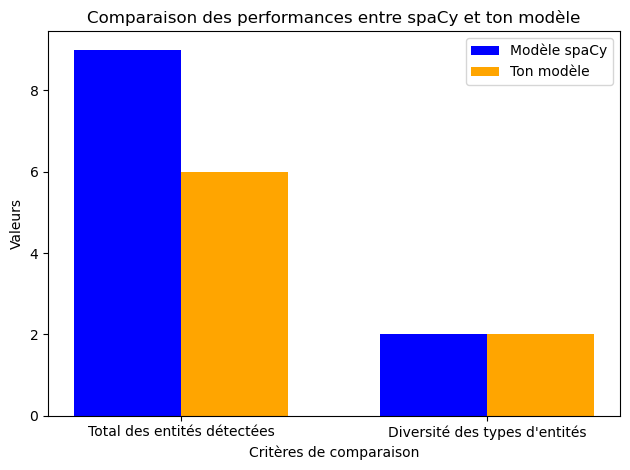

In [23]:
def extract_entities(doc):
    return [(ent.text, ent.label_) for ent in doc.ents]

# on compare les entités extraites entre deux modèles
def compare_models(spacy_model_path, custom_model_path, texts):
    print("Chargement des modèles...")

    # on charge le modèle spaCy pre-entraine et mon modele
    nlp_spacy = spacy.load(spacy_model_path)
    nlp_custom = spacy.load(custom_model_path)

    # listes pour stocker les resultats
    spacy_results = []
    custom_results = []

    print("Comparaison des résultats...")

    # comparaison sur chaque texte
    for text in texts:
        # resultats pour le modele spaCy
        doc_spacy = nlp_spacy(text)
        spacy_entities = extract_entities(doc_spacy)
        spacy_results.append(spacy_entities)

        # resultats pour mon modele
        doc_custom = nlp_custom(text)
        custom_entities = extract_entities(doc_custom)
        custom_results.append(custom_entities)

    return spacy_results, custom_results

# textes pour la comparaison
texts_to_compare = [
    '''Je souhaite me rendre à Lille en partant d'Aubervilliers pour assister à une conférence.''',
    '''Je compte me rendre à Bordeaux depuis Marseille pour rendre visite à ma soeur Paris.''',
    '''Je dois regarder les trains Toulouse - Brest pour aller voir mon ami Albert.''',
    '''Je dois planifier un voyage Nice Toulouse pour les prochaines vacances.''',
    '''Une réunion de travail m'oblige à faire Paris - Clermont-Ferrand la semaine prochaine.'''
]

# comparer les modèles
spacy_results, custom_results = compare_models("fr_core_news_md", "../../models/saved_models/model-best/", texts_to_compare)

# fonction pour afficher un graphique comparant les deux modeles
def visualize_model_comparison(spacy_results, custom_results, texts):
    print("Comparaison des modèles pour déterminer le meilleur...")

    # calcul du nombre total d'entites détectees pour chaque modele
    spacy_total_entities = sum([len(result) for result in spacy_results])
    custom_total_entities = sum([len(result) for result in custom_results])

    # calcul de la diversité des types d'entites (nb de types d'entites differents)
    spacy_entity_types = len(set([label for result in spacy_results for _, label in result]))
    custom_entity_types = len(set([label for result in custom_results for _, label in result]))

    ############################### graphe
    labels = ['Total des entités détectées', 'Diversité des types d\'entités']
    spacy_values = [spacy_total_entities, spacy_entity_types]
    custom_values = [custom_total_entities, custom_entity_types]

    x = range(len(labels))
    width = 0.35 

    fig, ax = plt.subplots()
    ax.bar(x, spacy_values, width, label='Modèle spaCy', color='blue')
    ax.bar([i + width for i in x], custom_values, width, label='Ton modèle', color='orange')

    ax.set_xlabel('Critères de comparaison')
    ax.set_ylabel('Valeurs')
    ax.set_title('Comparaison des performances entre spaCy et ton modèle')
    ax.set_xticks([i + width / 2 for i in x])
    ax.set_xticklabels(labels)
    ax.legend()

    plt.tight_layout()
    plt.show()

visualize_model_comparison(spacy_results, custom_results, texts_to_compare)